In [1]:
import torch
import torchvision.transforms as transforms
from torch import nn

import argparse
from sklearn.neighbors import NearestCentroid
import numpy as np
import math

from tqdm import tqdm
from pathlib import Path
import copy
import pandas as pd
import os

import torchvision.datasets as datasets
import matplotlib.pyplot as plt

/home/emizfliu/anaconda3/envs/urop_emi3/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def smooth(nums, window=5):
    ret = []
    for i in range(len(nums)):
        temp = []
        for j in range(max(0, i-window//2), min(len(nums), i+window//2)):
            temp.append(nums[j])
        ret.append(sum(temp)/len(temp))
    return ret

In [3]:
def plot_train_progress(ax, model_dir, title, mode):
    df = pd.read_csv(f'{model_dir}/losses.csv')
    layers = list(df.columns)[3:]
    df = df[df['phase'] == mode]
    #df = df[df['epoch'] % 5 == 0]
    epochs = [0]+[x+1 for x in list(df['epoch'])]
    for layer in layers:
        ax.plot(epochs, [0.1]+smooth(list(df[layer])))
    ax.set_title(title)
    #plt.legend([name_dict[x] for x in layers])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Accuracy')
    ax.legend(layers)
    ax.set_ylim(0, 1)
    

In [4]:
model_dir_base = 'baseline_5layer_mlp_fashion'
model_dir_etf = 'etf_5layer_mlp_fashion'
model_dir_etf2 = 'etf_5layer_mlp_fashion_final2'

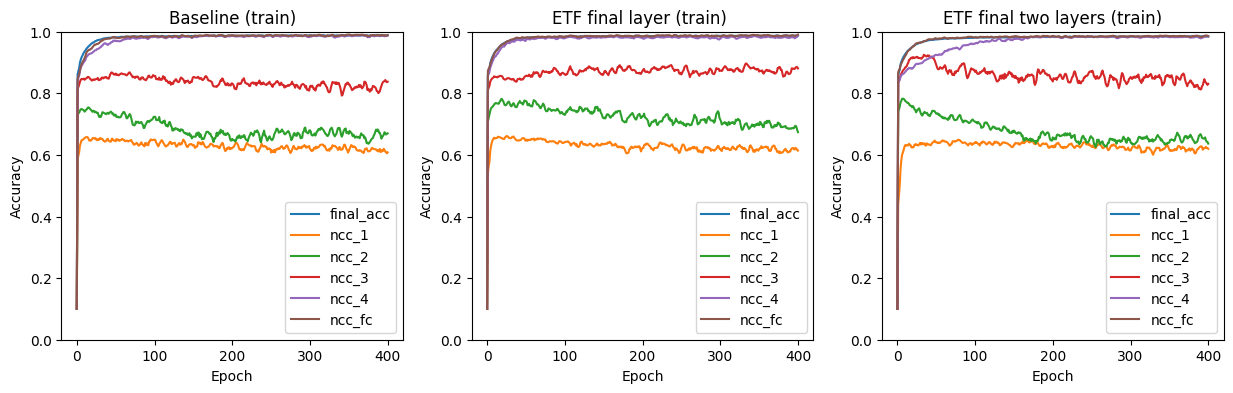

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
plot_train_progress(ax1, model_dir_base, 'Baseline (train)', 'train')
plot_train_progress(ax2, model_dir_etf, 'ETF final layer (train) ', 'train')
plot_train_progress(ax3, model_dir_etf2, 'ETF final two layers (train)', 'train')

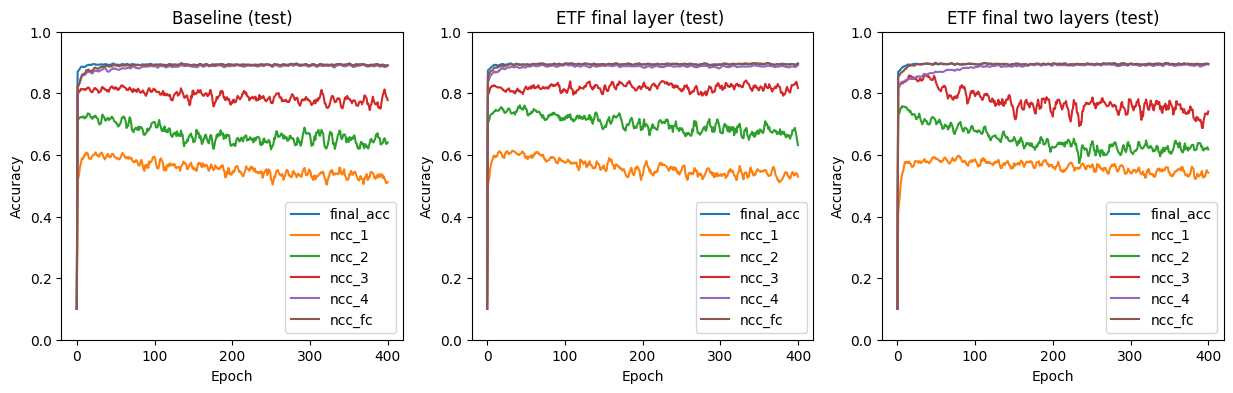

In [6]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
plot_train_progress(ax1, model_dir_base, 'Baseline (test)', 'val')
plot_train_progress(ax2, model_dir_etf, 'ETF final layer (test) ', 'val')
plot_train_progress(ax3, model_dir_etf2, 'ETF final two layers (test)', 'val')

In [11]:
model_dir_etf3 = 'etf_5layer_mlp_fashion_final3'
model_dir_adaptive = 'etf_5layer_mlp_fashion_adaptive'
model_dir_adaptive90 = 'etf_5layer_mlp_fashion_adaptive_90'

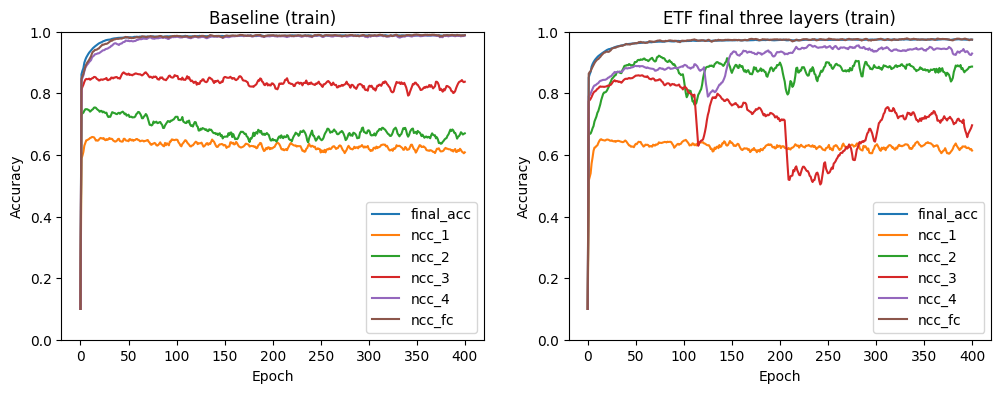

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_train_progress(ax1, model_dir_base, 'Baseline (train)', 'train')
plot_train_progress(ax2, model_dir_etf3, 'ETF final three layers (train)', 'train')

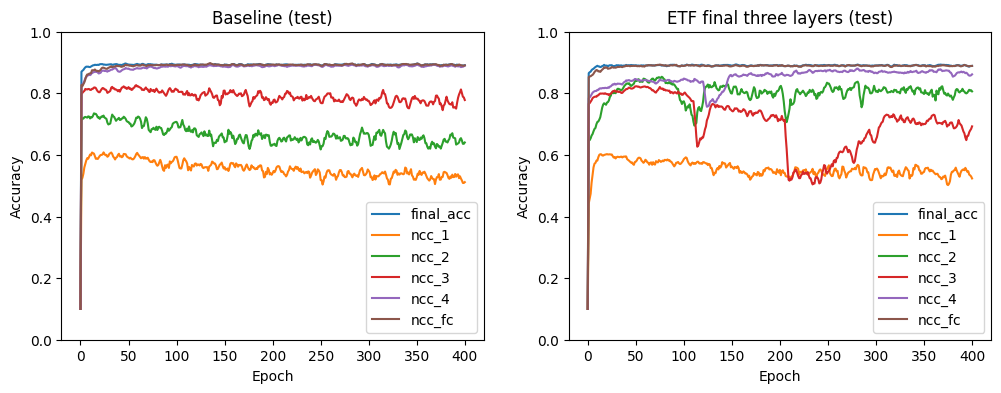

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_train_progress(ax1, model_dir_base, 'Baseline (test)', 'val')
plot_train_progress(ax2, model_dir_etf3, 'ETF final three layers (test)', 'val')

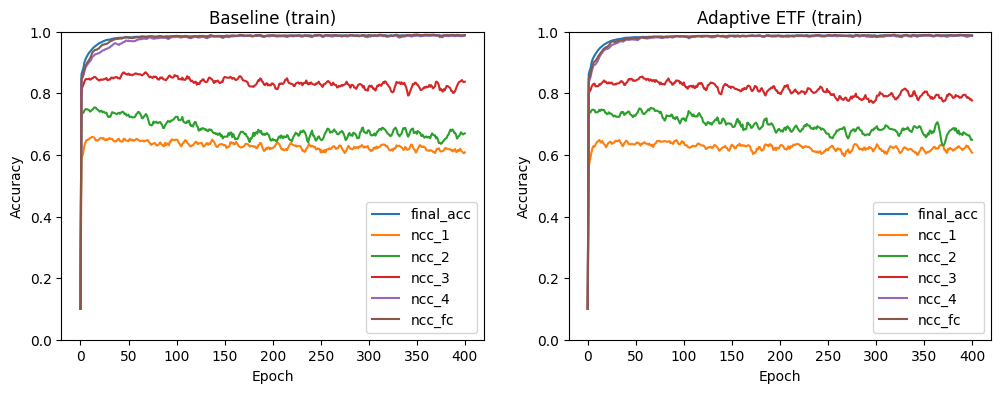

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_train_progress(ax1, model_dir_base, 'Baseline (train)', 'train')
plot_train_progress(ax2, model_dir_adaptive, 'Adaptive ETF (train)', 'train')
#plot_train_progress(ax3, model_dir_adaptive, 'Adaptive ETF eps=0.10 (train)', 'train')

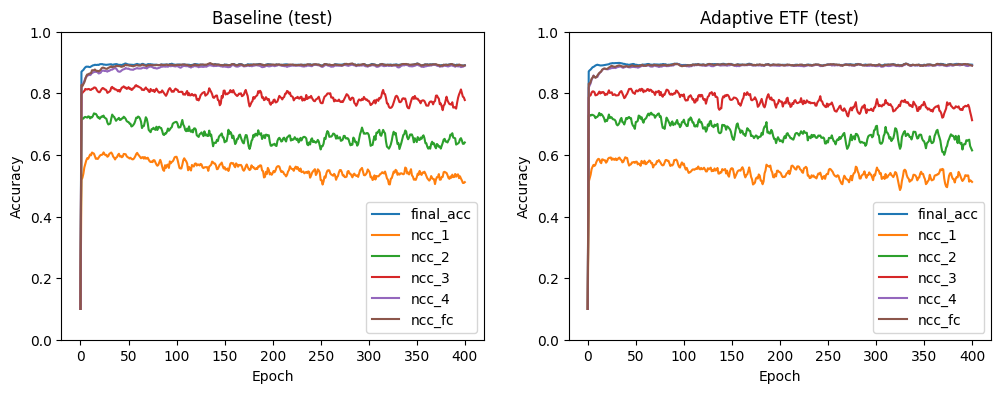

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
plot_train_progress(ax1, model_dir_base, 'Baseline (test)', 'val')
plot_train_progress(ax2, model_dir_adaptive, 'Adaptive ETF (test)', 'val')